In [1]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


students_data = pd.read_csv("StudentsPerformance (2).csv")
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,NAS score,DSD score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### K-Means algorithm
Identifying clusters

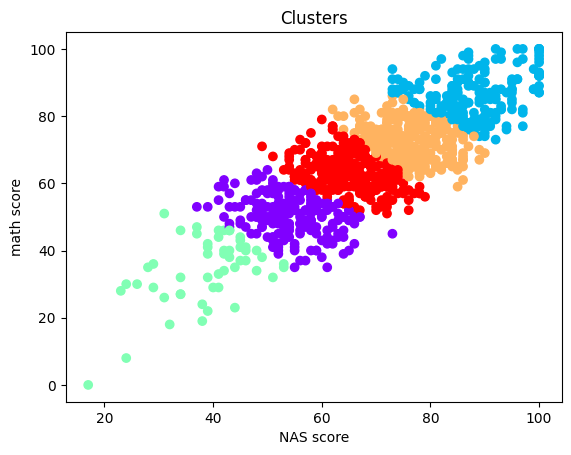

In [2]:
#Number of clusters set for 5
kmeans = KMeans(5)

#Clustering based on NAS and math scores
kmeans.fit(students_data.loc[:,["NAS score", "math score"]])
identified_clusters = kmeans.fit_predict(students_data.loc[:,["NAS score", "math score"]])

#Adding a column to the dataset with cluster fit 
data_with_clusters = students_data.copy()
data_with_clusters["Cluster"] = identified_clusters

plt.scatter(data_with_clusters["NAS score"], data_with_clusters["math score"], 
            c = data_with_clusters["Cluster"], cmap = "rainbow")
plt.title("Clusters")
plt.xlabel("NAS score")
plt.ylabel("math score")
plt.show()

#### Evaluation with elbow method
Trying to find a "sweet spot" between number of clusters and the sum of squared error

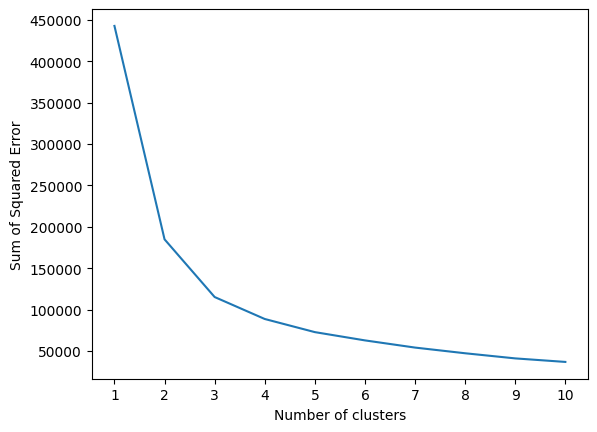

In [3]:
#Trying out different numbers as the number of clusters 
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(students_data.loc[:,["NAS score", "math score"]])
    #Computing the sum of squared error for each
    sse.append(kmeans.inertia_)


plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

"The sweet spot" from the elbow method is the point, where curve starts to bend. The best value seems to be "3", thus below K-Means algorithm is used again to identify clusters, but this time only three.

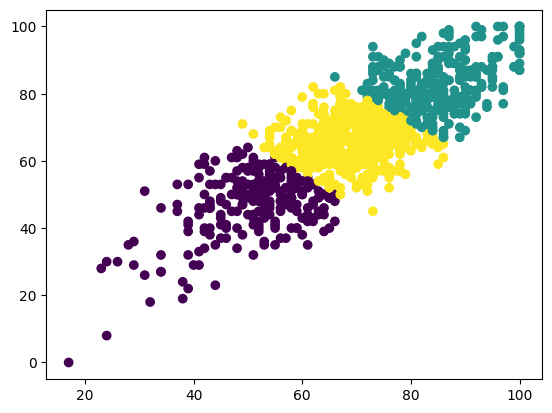

In [4]:
#Algorithm, fitting + adding info about clusters to data set
kmeans = KMeans(3)
kmeans.fit(students_data.loc[:,["NAS score", "math score"]])
identified_clusters = kmeans.fit_predict(students_data.loc[:,["NAS score", "math score"]])
students_data["Cluster"] = identified_clusters

#Visualization
plt.scatter(students_data["NAS score"], students_data["math score"], c = students_data["Cluster"])
plt.show()

#### Comparision of performance of students from different clusters in the exams

In [5]:
good_performance = data_with_clusters[data_with_clusters["Cluster"] == 0]
poor_performance = data_with_clusters[data_with_clusters["Cluster"] == 1]
excellent_performance = data_with_clusters[data_with_clusters["Cluster"] == 2]

C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\1861979396.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=excellent_performance['math score'], label="excellent performance", shade=True)
C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\1861979396.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=good_performance['math score'], label="good performance", shade=True)
C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\1861979396.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=poor_performance['math score'], label="poor performance", shade=True)


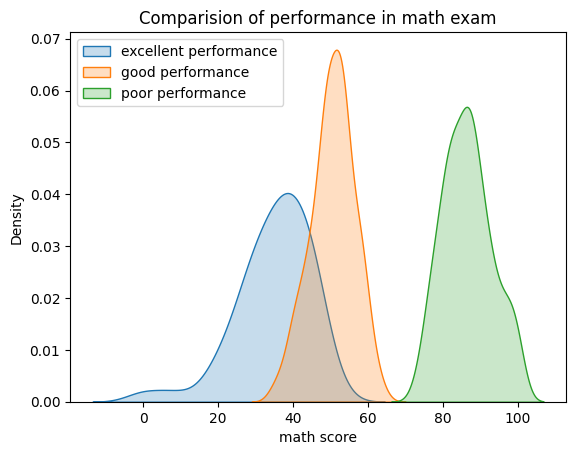

In [6]:
sns.kdeplot(data=excellent_performance['math score'], label="excellent performance", shade=True)
sns.kdeplot(data=good_performance['math score'], label="good performance", shade=True)
sns.kdeplot(data=poor_performance['math score'], label="poor performance", shade=True)
plt.title("Comparision of performance in math exam")
plt.legend(loc = "upper left")

C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\1393031193.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=excellent_performance['NAS score'], label="excellent performance", shade=True)
C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\1393031193.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=good_performance['NAS score'], label="good performance", shade=True)
C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\1393031193.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=poor_performance['NAS score'], label="poor performance", shade=True)


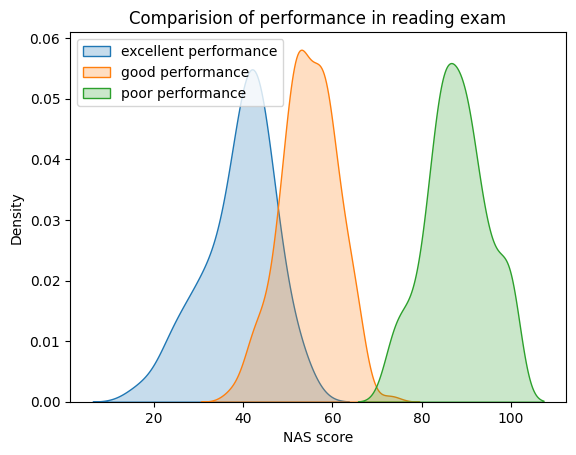

In [7]:
sns.kdeplot(data=excellent_performance['NAS score'], label="excellent performance", shade=True)
sns.kdeplot(data=good_performance['NAS score'], label="good performance", shade=True)
sns.kdeplot(data=poor_performance['NAS score'], label="poor performance", shade=True)
plt.title("Comparision of performance in reading exam")
plt.legend(loc = "upper left")

C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\2545159694.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=excellent_performance['DSD score'], label="excellent performance", shade=True)
C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\2545159694.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=good_performance['DSD score'], label="good performance", shade=True)
C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\2545159694.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=poor_performance['DSD score'], label="poor performance", shade=True)


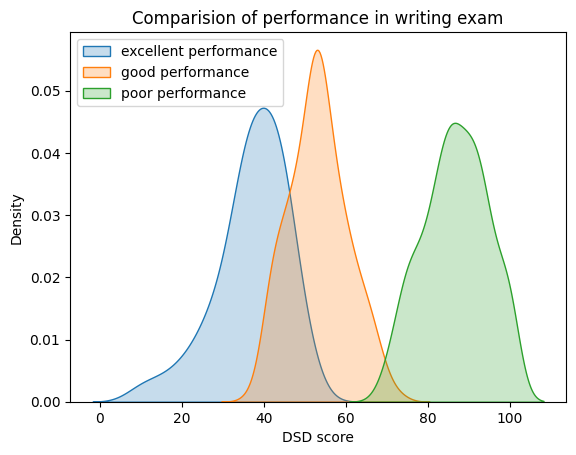

In [8]:
sns.kdeplot(data=excellent_performance['DSD score'], label="excellent performance", shade=True)
sns.kdeplot(data=good_performance['DSD score'], label="good performance", shade=True)
sns.kdeplot(data=poor_performance['DSD score'], label="poor performance", shade=True)
plt.title("Comparision of performance in writing exam")
plt.legend(loc = "upper left")

#### Cluster characteristics - Students with **excellent performance**
Simple analysis and visualizations to characterize students from excellent_performance cluster

Text(0.5, 1.0, 'Gender ratio')

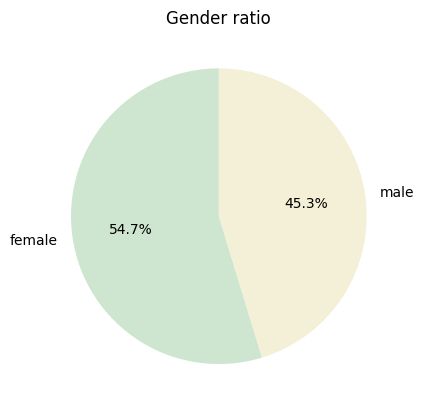

In [9]:
#gender analysis
gender_share = [len(excellent_performance[excellent_performance["gender"] == "female"]), len(excellent_performance[excellent_performance["gender"] == "male"])]

plt.pie(gender_share, labels = ["female", "male"], colors = ["#CEE5D0", "#F3F0D7"], autopct = '%1.1f%%', startangle = 90)
plt.title("Gender ratio")


Text(0.5, 1.0, 'Ethnicity')

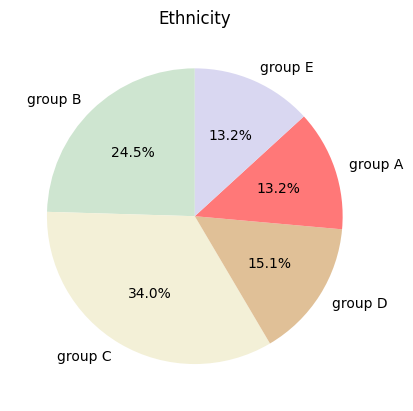

In [10]:
#ethnicity
ethnicity = excellent_performance["race/ethnicity"].unique()
ethnicity_share = [len(excellent_performance[excellent_performance["race/ethnicity"] == group]) for group in ethnicity]

plt.pie(ethnicity_share, labels = ethnicity, colors = ["#CEE5D0", "#F3F0D7", "#E0C097", "#FF7878", "#D9D7F1"], autopct = '%1.1f%%', startangle = 90)
plt.title("Ethnicity")

Text(0.5, 1.0, 'Parental level of education')

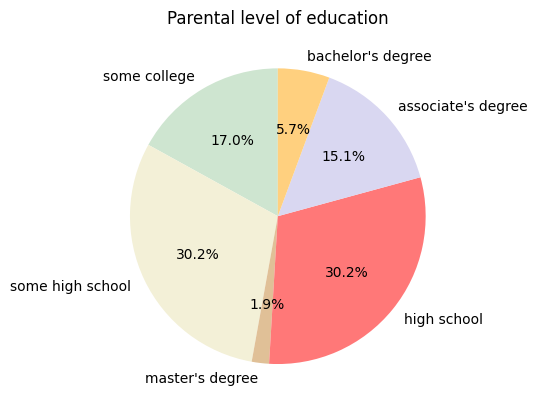

In [11]:
parents = excellent_performance["parental level of education"].unique()
parents_share = [len(excellent_performance[excellent_performance["parental level of education"] == group]) for group in parents]

plt.pie(parents_share, labels = parents, colors = ["#CEE5D0", "#F3F0D7", "#E0C097", "#FF7878", "#D9D7F1", "#FFD07F"], autopct = '%1.1f%%', startangle = 90)
plt.title("Parental level of education")

Text(0.5, 1.0, 'Lunch')

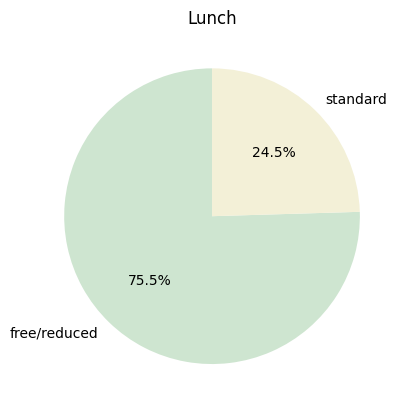

In [12]:
lunch = excellent_performance["lunch"].unique()
lunch_share = [len(excellent_performance[excellent_performance["lunch"] == group]) for group in lunch]

plt.pie(lunch_share, labels = lunch, colors = ["#CEE5D0", "#F3F0D7"], autopct = '%1.1f%%', startangle = 90)
plt.title("Lunch")

Text(0.5, 1.0, 'Test prepatation course')

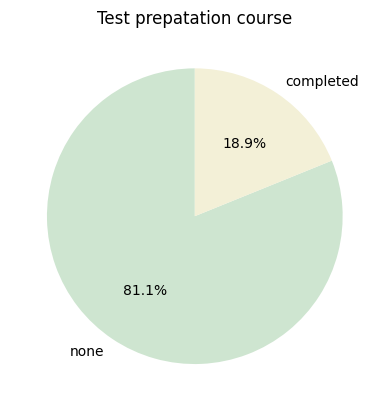

In [13]:
preparation = excellent_performance["test preparation course"].unique()
preparation_share = [len(excellent_performance[excellent_performance["test preparation course"] == group]) for group in preparation]

plt.pie(preparation_share, labels = preparation, colors = ["#CEE5D0", "#F3F0D7"], autopct = '%1.1f%%', startangle = 90)
plt.title("Test prepatation course")

In [14]:
poor_performance.describe()

,math score,NAS score,DSD score,Cluster
count,191.000000,191.000000,191.000000,191.0
mean,86.460733,87.853403,86.759162,1.0
std,6.507265,6.932720,7.839482,0.0
min,73.000000,73.000000,69.000000,1.0
25%,82.000000,84.000000,81.500000,1.0
50%,86.000000,88.000000,87.000000,1.0
75%,91.000000,92.000000,92.500000,1.0
max,100.000000,100.000000,100.000000,1.0


In [15]:
import pandas as pd
students_data = pd.read_csv("StudentsPerformance (2).csv")
students_data.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,NAS score,DSD score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
students_data.corr()

C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\2922618918.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  students_data.corr()


,math score,NAS score,DSD score
math score,1.000000,0.817580,0.802642
NAS score,0.817580,1.000000,0.954598
DSD score,0.802642,0.954598,1.000000


In [17]:
students_data.corr()['math score']['DSD score']

C:\Users\Krishna\AppData\Local\Temp\ipykernel_568\675260259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  students_data.corr()['math score']['DSD score']


0.8026420459498075

In [18]:
x=students_data['NAS score'].values.reshape(-1,1)
y=students_data['DSD score'].values.reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 1), (200, 1), (800, 1), (200, 1))

In [20]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

# Let's check the accuracy of our model

In [21]:
lm.score(x_test,y_test)*100

89.65646270509001

Accuracy is 